# Worksheet

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import sklearn.datasets as datasets

from kviz.visualizer import Visualizer

from importlib.metadata import version
assert version('kviz') == '0.0.10'


2024-11-18 17:27:44.697631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import tensorflow.keras as keras
# import sklearn.datasets as datasets

# from kviz.visualizer import Visualizer

# from importlib.metadata import version
# assert version('kviz') == '0.0.10'

TEMPFILE_NAME = "temp.png"

def save_to_gif(filename, images, duration=100):
    images[0].save(
        filename,
        optimize=False,
        save_all=True,
        append_images=images[1:],
        loop=0,
        duration=duration,
    )

np.random.seed(1)

COLORS = np.array(['purple', 'blue'])
cvals  = [0, .5, 1]
colors = ['purple', 'white', 'blue']
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
CMAP = mpl.colors.LinearSegmentedColormap.from_list("", tuples, 100)

CENTERS = [[0, 0]]
DATA, _ = datasets.make_blobs(
        n_samples=200,
        centers=CENTERS,
        cluster_std=1,
        random_state=1
    )

def sigmoid(x):
    e = np.exp(-x)
    return 1 / (1 + e)

# Confidence

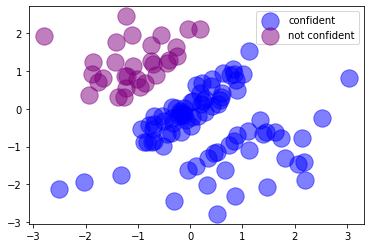

In [3]:
cw1 = -1 
cw2 = 1
cb = -1

sw1 = -1
sw2 = 1
sb = 1

X = np.array(list(filter(lambda x : cw1 * x[0] + cw2 * x[1] + cb < -.5 or cw1 * x[0] + cw2 * x[1] + cb > .5, DATA)))
X = np.array(list(filter(lambda x : sw1 * x[0] + sw2 * x[1] + sb < -.5 or sw1 * x[0] + sw2 * x[1] + sb > .5, X)))
C = np.array([0 if cw1 * x[0] + cw2 * x[1] + cb >= 0 else 1 for x in X])
S = np.array([0 if sw1 * x[0] + sw2 * x[1] + sb >= 0 else 1 for x in X])
conf = X[C==1]
not_conf = X[C==0]
plt.scatter(conf[:,0], conf[:,1], color=COLORS[1], s=300, alpha=.5, label='confident')
plt.scatter(not_conf[:,0], not_conf[:,1], color=COLORS[0], s=300, alpha=.5, label='not confident')
plt.legend()
plt.show()

# Stressed

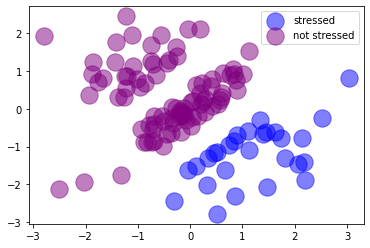

In [4]:
stressed = X[S==1]
not_stressed = X[S==0]
plt.scatter(stressed[:,0], stressed[:,1], color=COLORS[1], s=300, alpha=.5, label='stressed')
plt.scatter(not_stressed[:,0], not_stressed[:,1], color=COLORS[0], s=300, alpha=.5, label='not stressed')
plt.legend()
plt.show()

# Pass / Fail

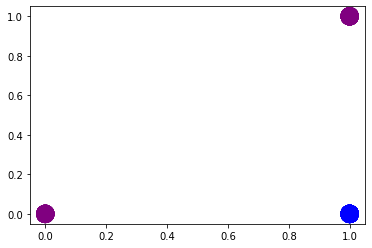

In [5]:
pass_fail = C ^ S
passed = X[pass_fail == 1]
failed = X[pass_fail == 0]
plt.scatter(C, S, color=COLORS[pass_fail].tolist(), s=300, alpha=.5)
plt.show()

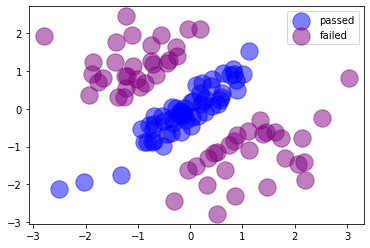

In [6]:
plt.scatter(passed[:,0], passed[:,1], color=COLORS[1], s=300, alpha=.5, label='passed')
plt.scatter(failed[:,0], failed[:,1], color=COLORS[0], s=300, alpha=.5, label='failed')
plt.legend()
plt.show()

# Visualization

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_dim=2, activation="sigmoid"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-1))

obj = Visualizer(model)
obj.fit(X, pass_fail, 1, 'pass_fail', 100, epochs=50, batch_size=200)
obj.view_activations_for(X[pass_fail==1], 'pass_activations', 100)
obj.view_activations_for(X[pass_fail==0], 'fail_activations', 100)

2/2 [==============================] - 0s 2ms/step


ImportError: requires pygraphviz http://pygraphviz.github.io/